In [2]:
from sympy import *
def irradiance(timeofday=pi,dayofyear=80/365*2*pi,latitude=40.6/180*pi,axis_tilt=23.4/180*pi):
    #earth rotation about z-axis
    #sun rays parallel to x-axis, sun in -x direction (midnight at tod=0)
    
    #latitude: rotation about y
    clat,slat=cos(latitude),sin(latitude)
    rot_lat=Matrix([[ clat,    0,  slat ], 
                       [   0.,    1,    0. ],
                       [-slat,    0,  clat ],])
    #time of day: rotation about z
    ctod,stod=cos(timeofday),sin(timeofday)
    rot_tod=Matrix([[ ctod, stod,    0. ], #rotation about z
                       [-stod, ctod,    0. ],
                       [   0.,    0,    1. ],])
    stilt=sin(axis_tilt)*sin(dayofyear-80/365*2*pi)
    ctilt=cos(axis_tilt)
    vlen=(stilt**2+ctilt**2)**0.5
    stilt/=vlen
    ctilt/=vlen
    #axis tilt: rotation about y
    rot_tilt=Matrix([[ ctilt,   0, stilt ], #rotation about y
                       [    0.,   1,    0. ],
                       [-stilt,   0, ctilt ],])
    vnormal=Matrix([[1],[0],[0]])
#    print(vnormal)
    vnormal=rot_lat*vnormal
#    print(vnormal)
    vnormal=rot_tod*vnormal
#    print(vnormal)    
    vnormal=rot_tilt*vnormal
#    print(vnormal) 
    return -vnormal[0,0]
tod,doy,lat,tilt=symbols('tod,doy,lat,tilt')
display(irradiance(tod,doy,lat,tilt).simplify())
print(str(irradiance(tod,doy,lat,tilt).simplify()))

1.0*(sin(lat)*sin(tilt)*sin(doy - 0.438356164383562*pi) - cos(lat)*cos(tilt)*cos(tod))/(-sin(tilt)**2*cos(doy - 0.438356164383562*pi)**2 + 1)**0.5

1.0*(sin(lat)*sin(tilt)*sin(doy - 0.438356164383562*pi) - cos(lat)*cos(tilt)*cos(tod))/(-sin(tilt)**2*cos(doy - 0.438356164383562*pi)**2 + 1)**0.5


In [2]:
irradiance(pi,160/365*2*pi).evalf()

0.953235340477370

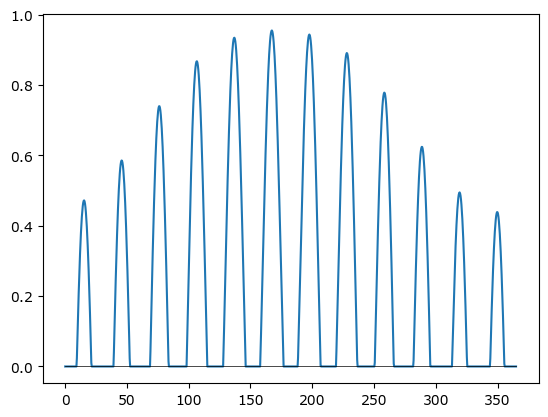

In [3]:
from matplotlib import pyplot as plt
import numpy as np
def irradiance(timeofday=12,dayofyear=80,latitude=40.6,axis_tilt=23.4):
  from math import sin,cos,pi
  tod,doy,lat,tilt=timeofday/24*2*pi,dayofyear/365*2*pi,latitude/360*2*pi,axis_tilt/360*2*pi
  return (sin(lat)*sin(tilt)*sin(doy - 0.438356164383562*pi) - \
                cos(lat)*cos(tilt)*cos(tod))/  \
         (-sin(tilt)**2*cos(doy - 0.438356164383562*pi)**2 + 1)**0.5
t=np.linspace(0,365,1000)
tod=(12*t/365*24)%24 #12 days/year
plt.plot(t,list(max(0,irradiance(tod_,t_)) for t_,tod_ in zip(t,tod)))
plt.plot((0,365),(0,0),'k',lw=0.5)
plt.show()
plt.close()

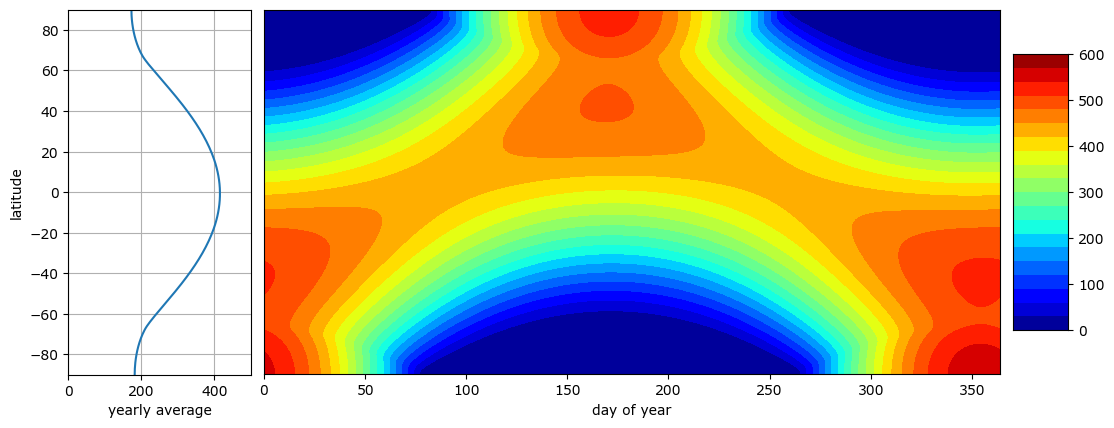

In [4]:
def a_b_sunrise(doy=80,lat=40.6,tilt=23.4):
  from math import sin, cos, pi, acos
  d2=(-sin(tilt/180*pi)**2*cos((doy - 80)/365*2*pi)**2 + 1)
  d=d2**0.5 if d2>0.0 else 1.0# prevent 0/0 error 
  a=cos(lat/180*pi)*cos(tilt/180*pi)/d
  b=sin(lat/180*pi)*sin(tilt/180*pi)*sin((doy - 80)/365*2*pi)/d
  cos_sunrise=b/a
  if cos_sunrise>=1:
    sunrise=0
  elif cos_sunrise<=-1:
    sunrise=pi
  else:
    sunrise=acos(b/a)
  return a,b,sunrise

def daily_avg_irradiation(doy=80,lat=40.6,tilt=23.4):
  from math import sin,pi
  a,b,sunrise=a_b_sunrise(doy=doy,lat=lat,tilt=tilt)
  daily_avg=(-2*sunrise*b+2*a*sin(sunrise))/(2*pi)
  return daily_avg
from math import pi,cos
avg_irrad_lat_doy_map=[[1361*(1-0.0167086*cos((doy-3)/365*2*pi))**-2*daily_avg_irradiation(doy=doy,tilt=23.4,lat=lat) for doy in range(365)]for lat in range(90,-91,-1)]
from matplotlib import pyplot as plt, cm as cmap
import numpy as np
fig,(ax2,ax1,ax)=plt.subplots(1,3,figsize=(10,17.5),\
  gridspec_kw=dict(wspace=0.04,left=0,right=1,top=0.7,width_ratios=[0.248,1,0.075]))
ax1.set_aspect('equal')
ax1.contourf(avg_irrad_lat_doy_map,cmap=cmap.jet,levels=20,vmin=0.0,vmax=600)
ax1.get_yaxis().set_visible(False)
ax1.set_xlabel('day of year')
ax2.set_aspect(2*500/180)
ax2.plot(np.average(avg_irrad_lat_doy_map,axis=1),range(-90,91),)
ax2.set_ylim((-90,90))
ax2.set_xlim((0,500))
ax2.set_ylabel('latitude')
ax2.set_xlabel('yearly average')
ax2.grid(True)
ax.set_xticks([])
ax.yaxis.tick_right()
ax.set_aspect(5)
ax.set_yticks([0,1/6,2/6,3/6,4/6,5/6,1],labels=['0','100','200','300','400','500','600'])
ax.contourf(np.ones((1,2))*[[0],[600]],  
             cmap=cmap.jet,levels=20,vmin=0.0,vmax=600)
plt.show()
plt.close()

a=1.0, b=0.0, sunrise/pi*12=6.0, avg=0.3183098861837907, noon=1.0
a=0.9177546256839811, b=0.0, sunrise/pi*12=6.0, avg=0.29213037044611545, noon=0.9177546256839811
a=1.0, b=0.0, sunrise/pi*12=6.0, avg=0.3183098861837907, noon=1.0
a=0.9177546256839811, b=-0.0, sunrise/pi*12=6.0, avg=0.29213037044611545, noon=0.9177546256839811


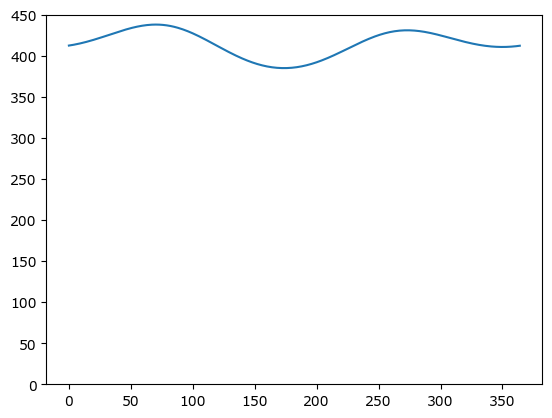

In [5]:
from math import pi
plt.plot(avg_irrad_lat_doy_map[90])
lat=0
tilt=23.4
for doy in (0.0,0.25,0.5,0.75):
  a,b,sunrise=a_b_sunrise(doy=80+365*doy,lat=lat,tilt=tilt)
  avg=daily_avg_irradiation(doy=80+365*doy,lat=lat,tilt=tilt)
  noon=irradiance(timeofday=12,dayofyear=80+365*doy,latitude=lat,axis_tilt=tilt)
  print(f'{a=}, {b=}, {sunrise/pi*12=}, {avg=}, {noon=}')
plt.ylim(0,450)
plt.show()
plt.close()



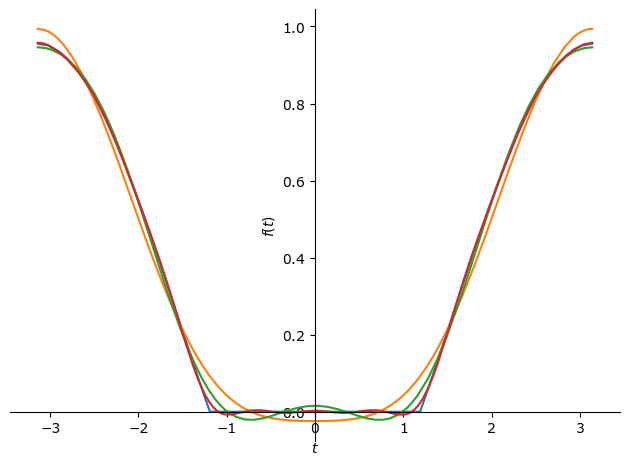

In [6]:
from sympy import fourier_series, pi, plot, sin,cos,sign,Heaviside as u,symbols
from sympy.abc import t,delta 
#a,b,sunrise= symbols('a,b,sunrise')
a,b,delta=a_b_sunrise(doy=80+365*0.25,lat=40.6,tilt=23.4)
f = (u(-t-delta)+u(t-delta))*(b-a*cos(t))
s = fourier_series(f, (t, -pi, pi))

s1 = s.truncate(3)
s2 = s.truncate(5)
s3 = s.truncate(7)
s4 = s.truncate(9)

from matplotlib import pyplot as plt
p=plot(f,s1,s2,s4,(t,-pi,pi),show=False,)
p.show()

In [7]:
from sympy import fourier_series, pi, plot, sin,cos,sign,Heaviside 
u=Heaviside
from sympy.abc import t,delta,a,b
offs=cos(delta*pi)
#f = (u(-t-delta)+u(t-delta))*(cos(delta)-cos(t))
f = (u(-t-delta)+u(t-delta))*(b-a*cos(t))
s = fourier_series(f, (t, -pi, pi)) 

if False:
    s1 = sum(sterms[:3])
    s2 = sum(sterms[:5])
    s3 = sum(sterms[:7])
    s4 = sum(sterms[:9])
    f=f.subs(delta,pi/2)
    p = plot(f, s1, s2, s3, s4,(t, -pi, pi), show=False, legend=False) 
    p.show()
if False:
  for i,term in  [(i,term) for i,term in zip(range(20),s.truncate(None))]:
    print(f'{str(term.simplify().subs({t:0,Heaviside(pi - delta):1,Heaviside(-delta - pi):0}).simplify())},')
#      print(f'{str(term.simplify())},')

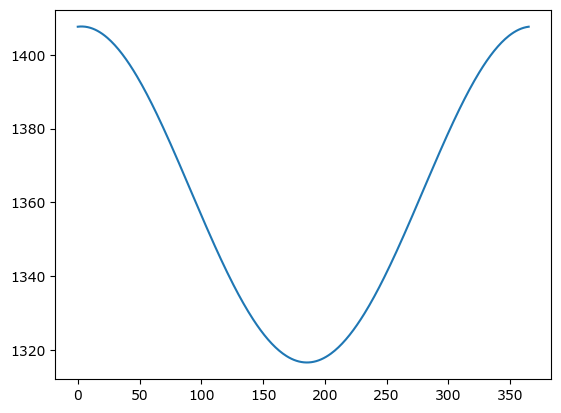

In [8]:
from math import pi,cos
from matplotlib import pyplot as plt
plt.plot([1361*(1-0.0167086*cos((doy-3)/365*2*pi))**-2 for doy in range(366)])
plt.show()
plt.close()

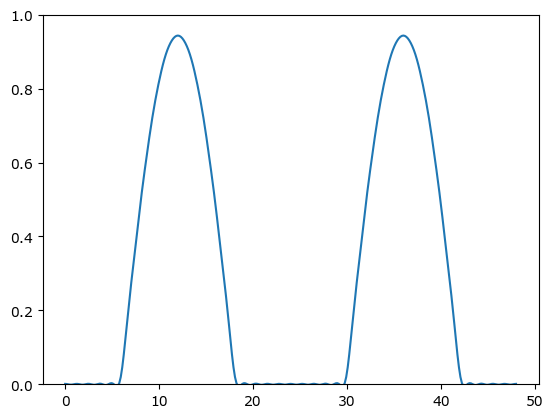

In [9]:
def coeffs(a,b,delta):
    from math import pi,sin,cos
    return [
(a*sin(delta) - b*delta + pi*b)/pi,
(a*(2*delta + sin(2*delta))/2 - pi*a - 2*b*sin(delta))/pi,
2*(2*a*cos(delta)**2 + a - 3*b*cos(delta))*sin(delta)/(3*pi),
2*(3*a*sin(delta)*cos(delta)**3 - b*sin(3*delta))/(3*pi),
(4*a*(24*sin(delta)**4 - 40*sin(delta)**2 + 15)*sin(delta) - 15*b*sin(4*delta))/(30*pi),
(15*a*sin(4*delta) + 10*a*sin(6*delta) - 24*b*sin(5*delta))/(60*pi),
(a*sin(5*delta)/5 + a*sin(7*delta)/7 - b*sin(6*delta)/3)/pi,
(7*a*(4*sin(6*delta) + 3*sin(8*delta)) - 48*b*sin(7*delta))/(168*pi),
(-8*a*(sin(delta)*cos(8*delta) - 8*sin(8*delta)*cos(delta)) - 63*b*sin(8*delta))/(252*pi),
(9*a*(5*sin(8*delta) + 4*sin(10*delta)) - 80*b*sin(9*delta))/(360*pi),
(a*sin(9*delta)/9 + a*sin(11*delta)/11 - b*sin(10*delta)/5)/pi,
(66*a*sin(10*delta) + 55*a*sin(12*delta) - 120*b*sin(11*delta))/(660*pi),
(-12*a*(sin(delta)*cos(12*delta) - 12*sin(12*delta)*cos(delta)) - 143*b*sin(12*delta))/(858*pi),
(91*a*sin(12*delta) + 78*a*sin(14*delta) - 168*b*sin(13*delta))/(1092*pi),
(a*sin(13*delta)/13 + a*sin(15*delta)/15 - b*sin(14*delta)/7)/pi,
(15*a*(8*sin(14*delta) + 7*sin(16*delta)) - 224*b*sin(15*delta))/(1680*pi),
(-16*a*(sin(delta)*cos(16*delta) - 16*sin(16*delta)*cos(delta)) - 255*b*sin(16*delta))/(2040*pi),
(17*a*(9*sin(16*delta) + 8*sin(18*delta)) - 288*b*sin(17*delta))/(2448*pi),
(a*sin(17*delta)/17 + a*sin(19*delta)/19 - b*sin(18*delta)/9)/pi,
(190*a*sin(18*delta) + 171*a*sin(20*delta) - 360*b*sin(19*delta))/(3420*pi),
]
def fouriersum(coeffs,t):
    from math import pi,cos
    return sum(c*cos(t*i)if i!=0 else c for i,c in enumerate(coeffs) )
c=coeffs(*a_b_sunrise(doy=80+365*0.25,lat=4,tilt=23.4)) 
from matplotlib import pyplot as plt
import numpy as np
tod=np.linspace(-0,48,301)
plt.plot(tod,[fouriersum(c,t/24*2*pi) for t in tod] )
plt.ylim((0,1))
plt.show()
plt.close()

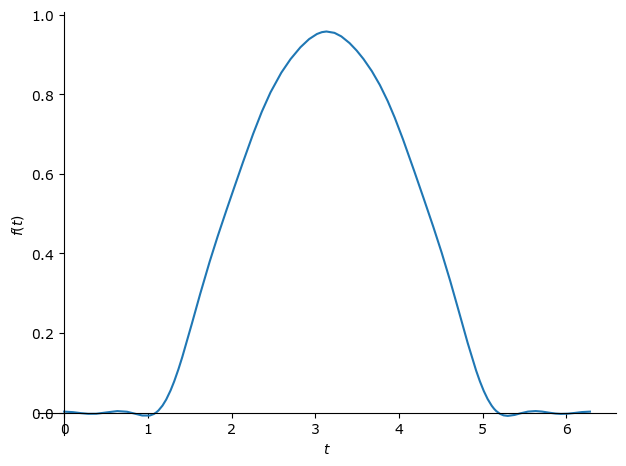

In [10]:
plot(s4,(t,0,2*pi))

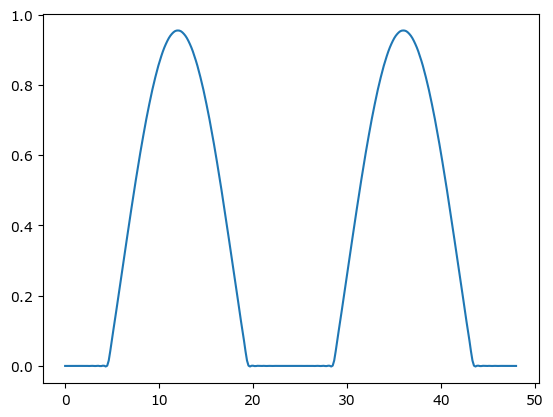

In [12]:
def coeffi(a,b,delta,i):
  from math import sin,pi
  if i>=2:
    return(a*(sin((i-1)*delta)/(i-1)+sin((i+1)*delta)/(i+1))-2*b*sin(i*delta)/i)/pi
  elif i==0:
    return (a*sin(delta) - b*delta)/pi + b
  elif i==1:
    return (a*(2*delta + sin(2*delta))/2 - 2*b*sin(delta))/pi - a
  else:
    raise Exception(f'Invalid value for argument i: {i=}')
a,b,delta=a_b_sunrise(doy=80+365*0.25,lat=40.6,tilt=23.4)
#for i in range(40):
#    print(coeffi(a,b,delta,i))
c=[coeffi(a,b,delta,i) for i in range(40)]
def fouriersum(coeffs,t):
    from math import pi,cos
    return sum(c*cos(t*i)if i!=0 else c for i,c in enumerate(coeffs) )
from matplotlib import pyplot as plt
import numpy as np
tod=np.linspace(-0,48,301)
plt.plot(tod,[fouriersum(c,t/24*2*pi) for t in tod] )
plt.show()
plt.close()